# Bank Marketing Campaign Analysis

*This project aims to analyze data from a bank marketing campaign to predict customer behavior using machine learning techniques. The dataset contains customer information and details about past marketing efforts.*

## Objective:
*Classification Task: Predict whether a client will subscribe to a term deposit (yes/no).*  
*Regression Task: Analyze the impact of numerical features (e.g., balance, duration) on customer behavior.*

In [89]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import accuracy_score, classification_report, mean_absolute_error, mean_squared_error


### 1.Load Dataset

In [91]:
# Load Excel file
df = pd.read_excel("C:\\Users\\AS\\Downloads\\bank-full.xlsx")

# Display first 5 rows
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


### 2️.Show Dataset Shape (Rows & Columns)

In [93]:
# Show dataset shape
print("Dataset Shape:", df.shape)

Dataset Shape: (45211, 17)


### 3.Describe Statistical Summaries

In [95]:
# Describe statistical summaries
print("Statistical Summary:\n", df.describe())

Statistical Summary:
                 age        balance           day      duration      campaign  \
count  45211.000000   45211.000000  45211.000000  45211.000000  45211.000000   
mean      40.936210    1362.272058     15.806419    258.163080      2.763841   
std       10.618762    3044.765829      8.322476    257.527812      3.098021   
min       18.000000   -8019.000000      1.000000      0.000000      1.000000   
25%       33.000000      72.000000      8.000000    103.000000      1.000000   
50%       39.000000     448.000000     16.000000    180.000000      2.000000   
75%       48.000000    1428.000000     21.000000    319.000000      3.000000   
max       95.000000  102127.000000     31.000000   4918.000000     63.000000   

              pdays      previous  
count  45211.000000  45211.000000  
mean      40.197828      0.580323  
std      100.128746      2.303441  
min       -1.000000      0.000000  
25%       -1.000000      0.000000  
50%       -1.000000      0.000000  
75%  

### 4.Check Skewness

In [97]:
# Check skewness for numerical columns only
numerical_cols = df.select_dtypes(include=[np.number]).columns
print("Skewness:\n", df[numerical_cols].skew())


Skewness:
 age          0.684818
balance      8.360308
day          0.093079
duration     3.144318
campaign     4.898650
pdays        2.615715
previous    41.846454
dtype: float64


### 5.Handle Outliers

#### A) Identify Outliers using Box Plot

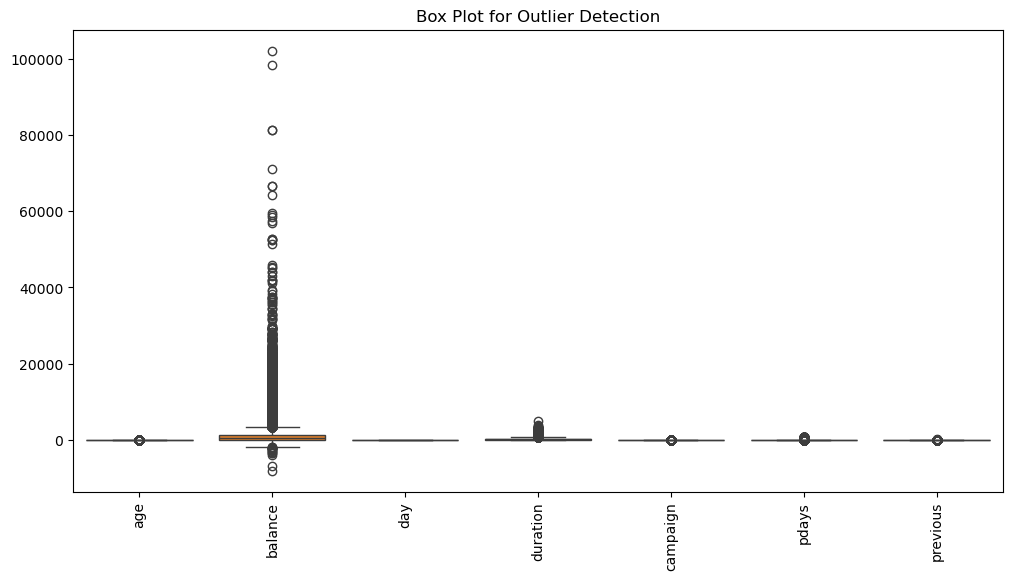

In [99]:
# Detect outliers using a box plot
plt.figure(figsize=(12,6))
sns.boxplot(data=df.select_dtypes(include=[np.number]))
plt.xticks(rotation=90)
plt.title("Box Plot for Outlier Detection")
plt.show()

#### B) Handle Outliers using IQR Method

In [102]:
# Compute IQR (Interquartile Range)
Q1 = df[numerical_cols].quantile(0.25)
Q3 = df[numerical_cols].quantile(0.75)
IQR = Q3 - Q1

# Remove outliers beyond 1.5 * IQR
df_no_outliers = df[~((df[numerical_cols] < (Q1 - 1.5 * IQR)) | (df[numerical_cols] > (Q3 + 1.5 * IQR))).any(axis=1)]
print(f"Original Shape: {df.shape}, New Shape after Outlier Removal: {df_no_outliers.shape}")


Original Shape: (45211, 17), New Shape after Outlier Removal: (28193, 17)


#### C) Handle Outliers using Capping

In [120]:
# Define lower and upper percentile limits (5% and 95%)
lower_limit = df[numerical_cols].quantile(0.05)
upper_limit = df[numerical_cols].quantile(0.95)

# Apply capping (clipping) to each column
for col in numerical_cols:
    df[col] = df[col].clip(lower=lower_limit[col], upper=upper_limit[col])

# Verify changes with summary statistics
df[numerical_cols].describe()


,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.764084,1116.990843,15.786180,242.220787,2.511513,37.552100,0.378691
std,9.698341,1581.303636,8.145712,191.849581,1.905038,90.371771,0.881417
min,27.000000,-172.000000,3.000000,35.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,59.000000,5768.000000,29.000000,751.000000,8.000000,317.000000,3.000000


### 6.Check for Missing Values

In [123]:
# Check missing values
print("Missing Values in Dataset:\n", df.isnull().sum())


Missing Values in Dataset:
 age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64


### Convert Categorical Data to Numerical

In [127]:
# Identify categorical and numerical columns
categorical_cols = df.select_dtypes(include=['object']).columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

print("Categorical Columns:", categorical_cols)
print("Numerical Columns:", numerical_cols)


Categorical Columns: Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'y'],
      dtype='object')
Numerical Columns: Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous'], dtype='object')


In [145]:
# Fill missing numerical values with median
df.fillna(df.median(), inplace=True)

# Fill missing categorical values with mode
df.fillna(df.mode().iloc[0], inplace=True)


In [136]:
print(df.columns)  # Check if column names match


Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_married', 'marital_single', 'education_secondary',
       'education_tertiary', 'education_unknown', 'default_yes', 'housing_yes',
       'loan_yes', 'contact_telephone', 'contact_unknown', 'month_aug',
       'month_dec', 'month_feb', 'month_jan', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'poutcome_other', 'poutcome_success', 'poutcome_unknown', 'y_yes'],
      dtype='object')


In [138]:
df.columns = df.columns.str.strip().str.lower()  # Remove spaces and make lowercase
print(df.columns)  # Check again


Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_married', 'marital_single', 'education_secondary',
       'education_tertiary', 'education_unknown', 'default_yes', 'housing_yes',
       'loan_yes', 'contact_telephone', 'contact_unknown', 'month_aug',
       'month_dec', 'month_feb', 'month_jan', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'poutcome_other', 'poutcome_success', 'poutcome_unknown', 'y_yes'],
      dtype='object')


In [140]:
print(df.head())  # See current structure


   age  balance  day  duration  campaign  pdays  previous  job_blue-collar  \
0   58     2143    5       261         1     -1         0            False   
1   44       29    5       151         1     -1         0            False   
2   33        2    5        76         1     -1         0            False   
3   47     1506    5        92         1     -1         0             True   
4   33        1    5       198         1     -1         0            False   

   job_entrepreneur  job_housemaid  ...  month_jun  month_mar  month_may  \
0             False          False  ...      False      False       True   
1             False          False  ...      False      False       True   
2              True          False  ...      False      False       True   
3             False          False  ...      False      False       True   
4             False          False  ...      False      False       True   

   month_nov  month_oct  month_sep  poutcome_other  poutcome_success  \
0 

In [142]:
# Identify categorical columns correctly
categorical_cols = df.select_dtypes(include=['object']).columns

# Apply One-Hot Encoding only to existing columns
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

print("Categorical columns successfully encoded!")


Categorical columns successfully encoded!


### 7. Feature Scaling

In [197]:
# Initialize the scaler
scaler = StandardScaler()

# Apply scaling to numerical features
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

print("Numerical columns successfully scaled!")
df.head()

Numerical columns successfully scaled!


,age,balance,day,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,...,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown,y_yes,y
0,1.777222,0.648845,-1.324169,0.097886,-0.793438,-0.426599,-0.429644,False,False,False,...,False,True,False,False,False,False,False,True,False,0
1,0.333660,-0.688042,-1.324169,-0.475486,-0.793438,-0.426599,-0.429644,False,False,False,...,False,True,False,False,False,False,False,True,False,0
2,-0.800567,-0.705116,-1.324169,-0.866422,-0.793438,-0.426599,-0.429644,False,True,False,...,False,True,False,False,False,False,False,True,False,0
3,0.642995,0.246008,-1.324169,-0.783022,-0.793438,-0.426599,-0.429644,True,False,False,...,False,True,False,False,False,False,False,True,False,0
4,-0.800567,-0.705749,-1.324169,-0.230500,-0.793438,-0.426599,-0.429644,False,False,False,...,False,True,False,False,False,False,False,True,False,0


In [199]:
# Save the preprocessed dataset
df.to_csv("C:\\Users\\AS\\Downloads\\bank-full-processed.csv", index=False)
print("\n✅ Data Preprocessing Completed! File Saved as 'bank-full-processed.csv'")


✅ Data Preprocessing Completed! File Saved as 'bank-full-processed.csv'
